In [5]:
from sources import Utils
from igraph import *

In [6]:
g = Graph()
Utils.LoadData("adb",g,"/home/dark/Desktop/Imp/Social-Networks/Data/facebook/")
print(len(g.vs))

0
filename:  /home/dark/Desktop/Imp/Social-Networks/Data/facebook/0.edges
Inserted node 186
Inserted node 122
Inserted node 285
Inserted node 24
Inserted node 346
Inserted node 271
Inserted node 304
Inserted node 176
Inserted node 9
Inserted node 130
Inserted node 329
Inserted node 204
Inserted node 213
Inserted node 252
Inserted node 332
Inserted node 82
Inserted node 65
Inserted node 276
Inserted node 26
Inserted node 280
Inserted node 272
Inserted node 211
Inserted node 199
Inserted node 84
Node  236  already added
0
Inserted node 133
Inserted node 62
Inserted node 239
Inserted node 172
Inserted node 322
Inserted node 53
Inserted node 3
Inserted node 170
Inserted node 175
Inserted node 46
Node  170  already added
32
Node  176  already added
8
Node  170  already added
32
Inserted node 56
Inserted node 254
Inserted node 194
Inserted node 231
Inserted node 117
Inserted node 127
Inserted node 135
Node  285  already added
3
Inserted node 103
Inserted node 188
Node  133  already added
25


In [7]:
def closeness(g):
    close = g.closeness(g.vs)
    for i in range(1,6):
        maxval = max(close)
        print(i,"==node",g.vs[close.index(maxval)]['name'], " with score of ",maxval)
        close.remove(maxval)
    close = g.closeness(g.vs)
    return close

In [8]:
global close 
close = closeness(g)
print(close)

1 ==node 33  with score of  1.0
2 ==node 33  with score of  1.0
3 ==node 112  with score of  1.0
4 ==node 120  with score of  1.0
5 ==node 120  with score of  1.0
[0.33026584867075665, 0.35533553355335534, 0.3729792147806005, 0.3649717514124294, 0.2687188019966722, 0.29204339963833637, 0.3786635404454865, 0.3695652173913043, 0.31573802541544477, 0.36830102622576966, 0.34107708553326294, 0.3368091762252346, 0.330603889457523, 0.36251402918069586, 0.37126436781609196, 0.3704128440366973, 0.3246231155778894, 0.3067426400759734, 0.3142023346303502, 0.37470997679814383, 0.36579841449603623, 0.3678815489749431, 0.3226773226773227, 0.34545454545454546, 0.3220338983050847, 0.3198019801980198, 0.31728880157170924, 0.3704128440366973, 0.3507057546145494, 0.38682634730538923, 0.30820610687022904, 0.3070342205323194, 0.3738425925925926, 0.3580931263858093, 0.2649712879409352, 0.3795534665099882, 0.2702928870292887, 0.2753623188405797, 0.330603889457523, 0.28234265734265734, 0.29257246376811596, 0.

In [9]:
N=len(g.vs)
layt = g.layout("kk",dim=3)

In [10]:
labels = []
for eachNode in g.vs:
    labels.append(eachNode['name'])

In [11]:
Edges = []
for each in g.es:
    Edges.append(each.tuple)

In [12]:
Xn=[layt[k][0] for k in range(N)]
Yn=[layt[k][1] for k in range(N)]
Zn=[layt[k][2] for k in range(N)]
Xe=[]
Ye=[]
Ze=[]

for e in Edges:
    Xe+=[layt[e[0]][0],layt[e[1]][0], 0]
    Ye+=[layt[e[0]][1],layt[e[1]][1], 0]
    Ze+=[layt[e[0]][2],layt[e[1]][2], 0]

In [13]:
import matplotlib.pyplot as plt 
%matplotlib inline

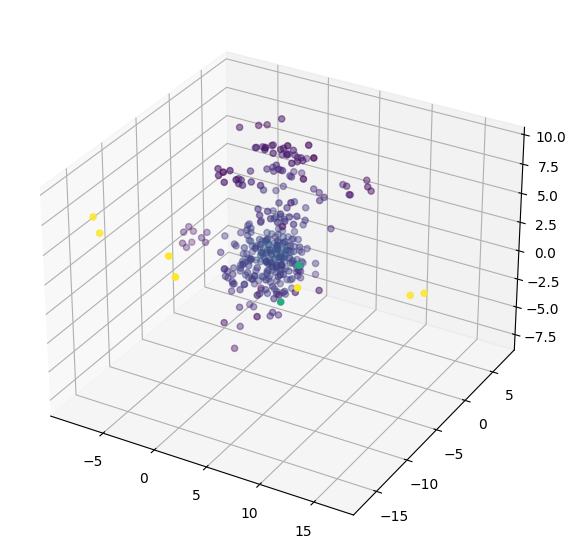

In [14]:
fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection="3d")
ax.scatter3D(xs = Xn,ys=Yn,zs=Zn,c=close)

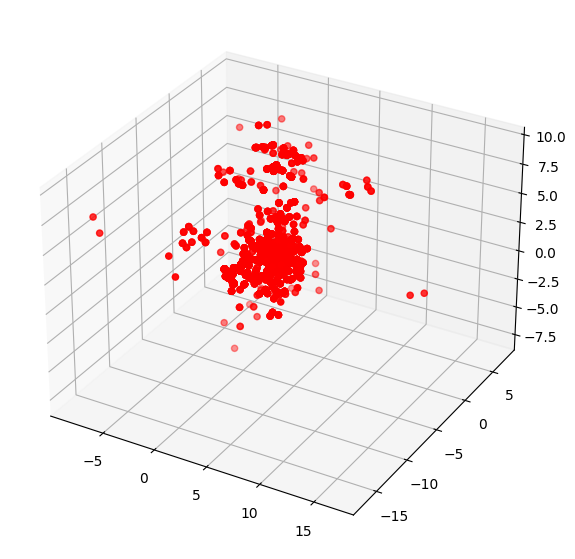

In [15]:
fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection="3d")
ax.scatter3D(xs = Xe,ys=Ye,zs=Ze,color="r")

In [39]:
import networkx as nx 
G1 = nx.read_edgelist("Data/facebook_combined.txt",create_using=nx.Graph(),nodetype=int)
print(nx.info(G1))

Graph with 4039 nodes and 88234 edges


(-1.1665495729446411,
 0.7527359819412232,
 -0.6173950396478176,
 1.1327325366437435)

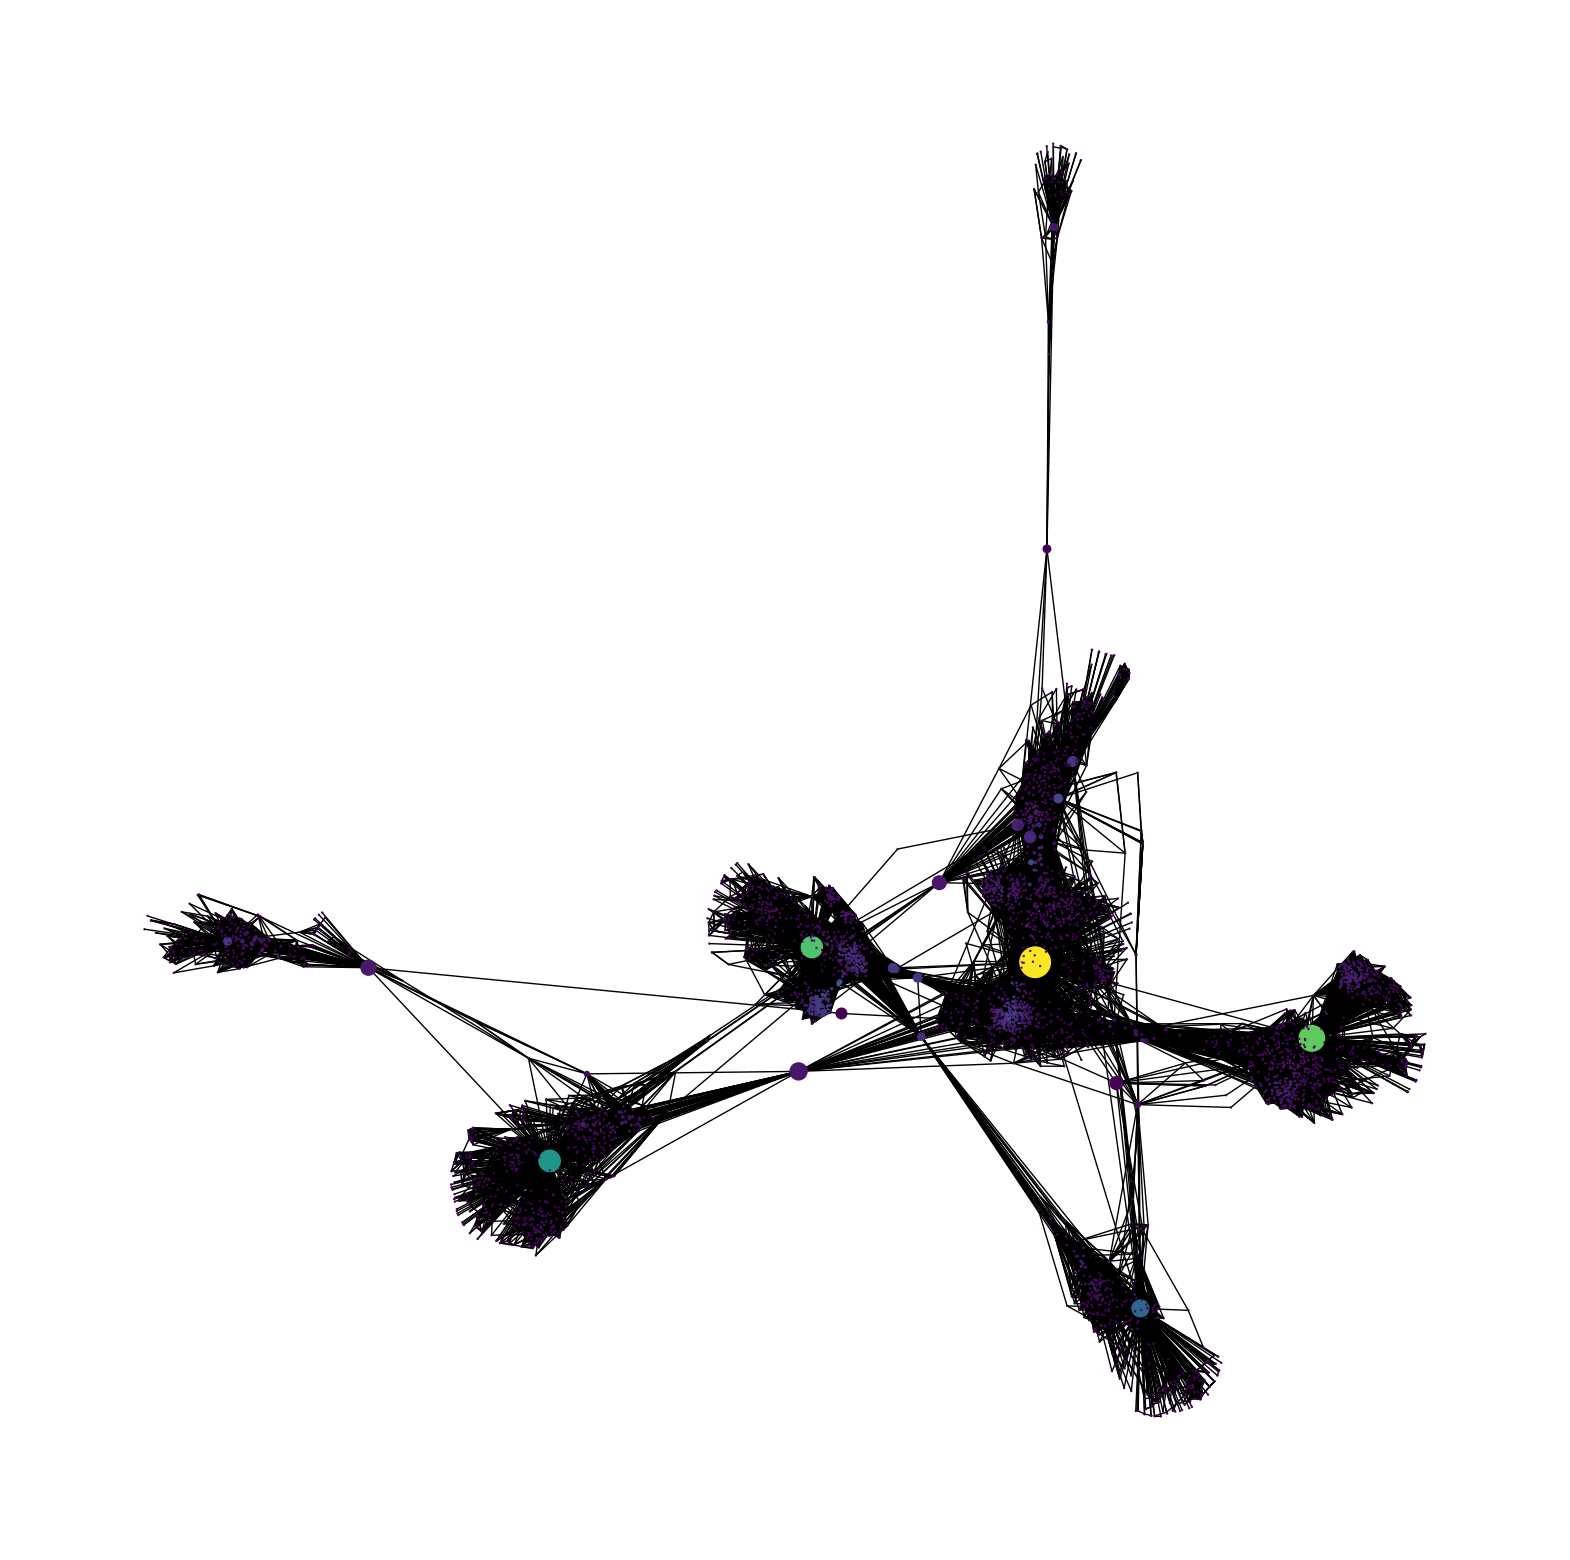

In [40]:
pos = nx.spring_layout(G1)
centrality_between = nx.betweenness_centrality(G1,normalized=True,endpoints=True)
node_color = [2000. * G1.degree(v) for v in G1]

node_size = [v * 1000 for v in centrality_between.values()]
plt.figure(figsize=(20,20))

nx.draw_networkx(G1,pos=pos,with_labels=False,node_color=node_color,node_size=node_size)
plt.axis("off")

In [41]:
import numpy as np 
neigh = [1,20,40,65,75,90,1000,]
for i in range(len(neigh)):
    all_neigh = list(nx.classes.function.all_neighbors(G1,neigh[i]))
    print("All neighbors for node: ",str(neigh[i]),"---->",str(all_neigh))

All neighbors for node:  1 ----> [0, 48, 53, 54, 73, 88, 92, 119, 126, 133, 194, 236, 280, 299, 315, 322, 346]
All neighbors for node:  20 ----> [0, 2, 14, 41, 44, 111, 115, 149, 162, 214, 226, 312, 326, 333, 343]
All neighbors for node:  40 ----> [0, 21, 25, 26, 29, 56, 67, 72, 77, 113, 132, 133, 141, 142, 158, 169, 172, 199, 200, 203, 212, 213, 224, 231, 232, 239, 257, 258, 265, 271, 272, 274, 277, 280, 298, 304, 307, 315, 317, 322, 325, 329, 332, 334]
All neighbors for node:  65 ----> [0, 7, 13, 25, 82, 118, 203, 252, 261, 297, 314, 339]
All neighbors for node:  75 ----> [0, 9, 56, 67, 85, 170, 188, 200, 258, 272, 274, 304, 322, 323]
All neighbors for node:  90 ----> [0, 179]
All neighbors for node:  1000 ----> [107, 924, 974, 985, 1010, 1127, 1134, 1228, 1304, 1474, 1640, 1667, 1703, 1725, 1759, 1840]
